<br><br><br>
# <b>THE SPARKS FOUNDATION </b>
##### <B>DATA SCIENCE & BUSINESS  ANALYTICS</B> 
#### <i> GRIP SEPTEMBER 2022</i>
<B>TASK #02 : PREDICTION USING UNSUPERVISED MACHINE LEARNING<Br><BR></B>
DESCRIPTION :<U>PREDICT THE OPTIUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY FROM GIVEN IRIS DATA</U><BR>
    EXECUTED BY : <B>GAUTAM BHAGAT</B>

<br><br>

<b>What is Iris Dataset?</b>
<ul>
    <li>
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.
    </li>
</ul>
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" />

<b>Importing Libraries</b>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')

<b>Reading the data</b>

In [2]:
iris_data = pd.read_csv("https://raw.githubusercontent.com/mrgautambhagat/datasets/main/Iris.csv")

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.drop('Id',axis=1,inplace=True)

In [5]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## <b>Data Analysis </b>

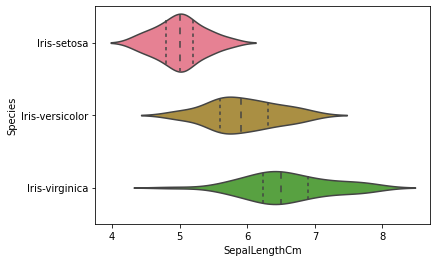

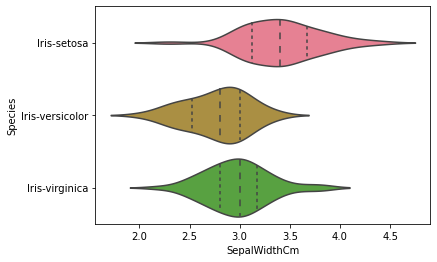

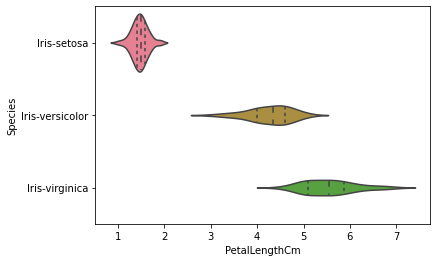

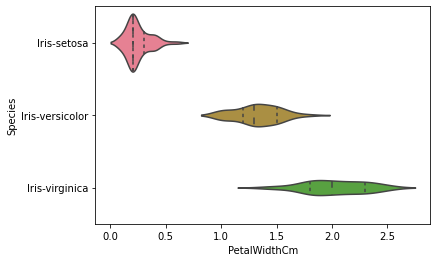

In [6]:
sepal_len = sns.violinplot(y='Species',x='SepalLengthCm',data=iris_data,inner='quartile')
plt.show()
sepal_wid = sns.violinplot(y='Species',x='SepalWidthCm',data=iris_data,inner='quartile')
plt.show()
petal_len = sns.violinplot(y='Species',x='PetalLengthCm',data=iris_data,inner='quartile')
plt.show()
petal_wid = sns.violinplot(y='Species',x='PetalWidthCm',data=iris_data,inner='quartile')
plt.show()

### <b>Plotting Sepal Length v/s Sepal Width Graph</b>

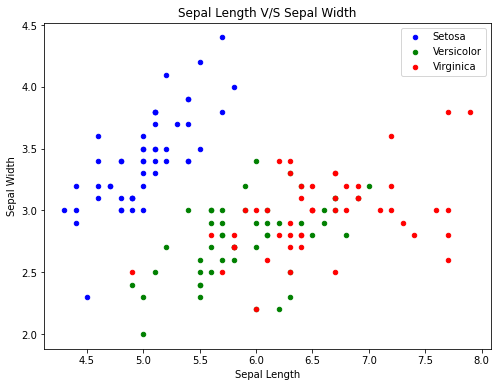

In [7]:
fig = iris_data[iris_data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label="Setosa")
iris_data[iris_data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label="Versicolor",ax=fig)
iris_data[iris_data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label="Virginica",ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length V/S Sepal Width')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<b>OBSERVATIONS : </b><br>
The following are the observations in SepalLength vs SepalWidth Combination-
<ol>
    <li>Setosa is Somewhat Linear.</li>
    <li>Versicolor and Virginica are scattered without any linear relations between their width and length.</li>
</ol>
Let's try some other combinations.

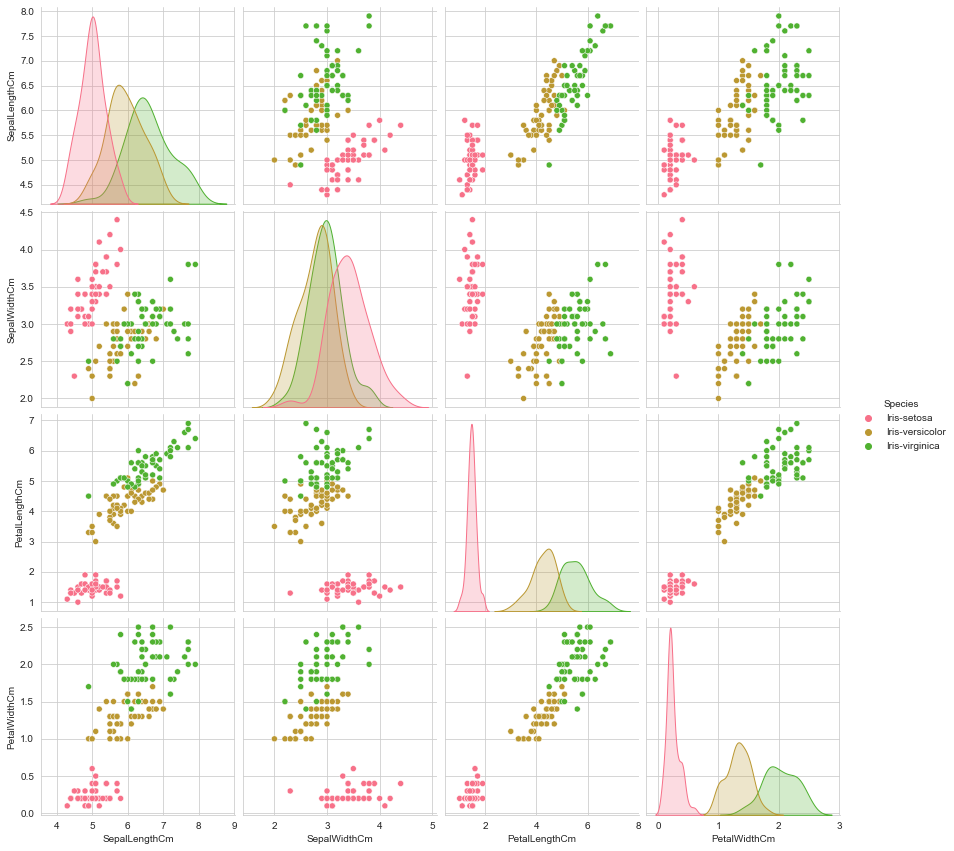

In [8]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris_data,hue='Species',height=3)
plt.show()

## <b>K-Means Clustering</b>
<p>K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.</p>
<p>
Clustering can be done by following Steps :-
<ol>
    <li>Select the no.of clusters you want to identify in your data. In this case, we are going to use 3 clusters for 3 iris types. Therefore, <b>K=3</b>.</li>
     <li>Random selection of 3 distinct datapoints. Those points are initial Clusters.</li>
     <li>Measuring the distance between first point and 3 initial clusters assign the first point to the nearest initial cluster.</li>
     <li>Continue Step 3 for remaining points till we get 3 different clusters.</li>
     <li>Calculate the mean of ech cluster.</li>
</ol>
</p>


In [9]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<b>Creting new Dataframe with values of PetalLength and PetalWidth </b>

In [10]:
df_new = pd.DataFrame({'x':iris_data['PetalLengthCm'],'y':iris_data['PetalWidthCm']})
df_new.head()

,x,y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
iris_data.loc[iris_data['Species']=='Iris-setosa','cluster']= '0'
iris_data.loc[iris_data['Species']=='Iris-versicolor','cluster']= '1'
iris_data.loc[iris_data['Species']=='Iris-virginica','cluster']= '2'
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [12]:
df_new['cluster']=iris_data['cluster']
df_new

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


### <b>Applying K-Means Algorithm </b>

In [13]:
from sklearn.cluster import KMeans
KMean = KMeans(n_clusters=3)
KMean.fit(df_new)

KMeans(n_clusters=3)

In [14]:
KMean.cluster_centers_

array([[1.464     , 0.244     , 0.        ],
       [5.57346939, 2.03265306, 2.        ],
       [4.26470588, 1.33333333, 1.01960784]])

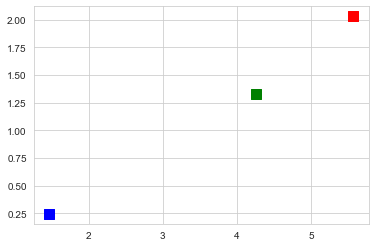

In [15]:
plt.scatter(1.464     , 0.244 ,s=100,c='blue',marker='s')
plt.scatter(4.26470588, 1.33333333,s=100,c='green',marker='s')
plt.scatter(5.57346939, 2.03265306 ,s=100,c='red',marker='s')
plt.show()

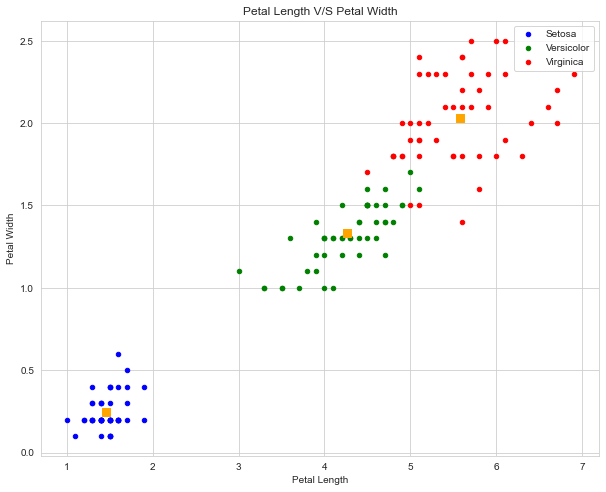

In [16]:
fig = iris_data[iris_data.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label="Setosa")
iris_data[iris_data.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label="Versicolor",ax=fig)
iris_data[iris_data.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red',label="Virginica",ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length V/S Petal Width')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.scatter(1.464     , 0.244 ,s=50,c='orange',marker='s')
plt.scatter(4.26470588, 1.33333333,s=50,c='orange',marker='s')
plt.scatter(5.57346939, 2.03265306 ,s=50,c='orange',marker='s')
plt.show()

<br><br><br><b>Thank You !!</b>